In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from utils import load, plot_history, compose_alpha, plot_history
from models import own_custom_conv_net, neuralmon_conv_net, smaller_VGGNet

In [2]:
def custom_CNN_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)),   
        
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(64, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 

        layers.Conv2D(128, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(150, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Flatten(), 
        layers.Dense(64, activation='relu'), 
        layers.Dense(18, activation='sigmoid'), 
    ])
    
    model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
    
    return model

In [3]:
train_dataset, val_dataset = load(csv="pokemon_image_dataset.csv", image_path="./images/pokemon_image_dataset")
train_dataset2, val_dataset2 = load(csv="synthetic_pokemon.csv", image_path="./images/synthetic_pokemon")
train_dataset3, val_dataset3 = load(csv="synthetic_pokemon_v2.csv", image_path="./images/synthetic_pokemon_v2")

In [4]:
histories = []

In [5]:
model1 = custom_CNN_model((120,120,3))

history = model1.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history)

model2 = custom_CNN_model((120,120,3))

history = model2.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset2,
    verbose = 1
)
histories.append(history)

model3 = custom_CNN_model((120,120,3))

history = model3.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset3,
    verbose = 1
)
histories.append(history)

Epoch 1/50


c:\Uni\Enhancing-Pokemon-Type-Recognition-with-Hybrid-Datasets\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - AUC: 0.5325 - Precision: 0.0865 - Recall: 0.2329 - accuracy: 0.0700 - loss: 0.5814 - val_AUC: 0.5295 - val_Precision: 0.0810 - val_Recall: 0.1974 - val_accuracy: 0.0247 - val_loss: 0.5119
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - AUC: 0.6531 - Precision: 0.3097 - Recall: 0.0302 - accuracy: 0.1995 - loss: 0.2875 - val_AUC: 0.6093 - val_Precision: 0.1893 - val_Recall: 0.1328 - val_accuracy: 0.2037 - val_loss: 0.3574
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - AUC: 0.7729 - Precision: 0.7129 - Recall: 0.0558 - accuracy: 0.3466 - loss: 0.2445 - val_AUC: 0.5973 - val_Precision: 0.1149 - val_Recall: 0.2839 - val_accuracy: 0.0988 - val_loss: 0.5170
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - AUC: 0.8435 - Precision: 0.8250 - Recall: 0.0997 - accuracy: 0.4247 - loss: 0.2187 - val_AUC: 0.6826 - val_Precision: 0.2329 - val_Recall: 0.2090 - val_accuracy: 0.1975 - val_loss: 0.4281
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 12

Max   training accuracy Model 1 in Epoch 22 with value 0.8068006038665771
Max validation accuracy Model 1 in Epoch 24 with value 0.845678985118866

Max   training accuracy Model 2 in Epoch 24 with value 0.7959814667701721
Max validation accuracy Model 2 in Epoch 7 with value 0.1269230842590332

Max   training accuracy Model 3 in Epoch 15 with value 0.812982976436615
Max validation accuracy Model 3 in Epoch 13 with value 0.1156812310218811



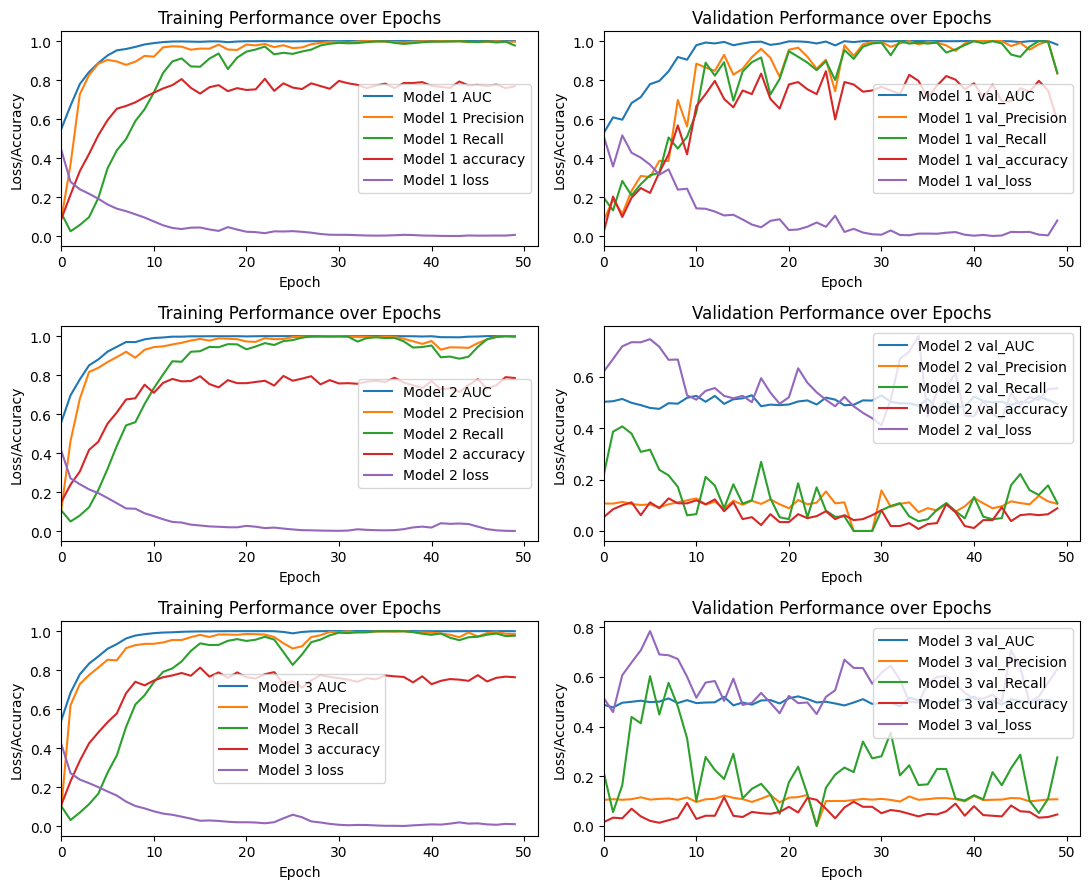

In [6]:
for i, history in enumerate(histories):
    print("Max   training accuracy Model "+str(i+1)+" in Epoch", np.argmax(history.history['accuracy']), "with value", np.max(history.history['accuracy']))
    print("Max validation accuracy Model "+str(i+1)+" in Epoch", np.argmax(history.history['val_accuracy']), "with value", np.max(history.history['val_accuracy']))
    print()

plot_history(histories)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tf.Tensor([0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0], shape=(18,), dtype=int32)
[0.08  0.111 0.016 0.005 0.62  0.772 0.04  0.026 0.045 0.187 0.932 0.138
 0.024 0.045 0.16  0.047 0.642 0.033]
(120, 120, 3)
Accuracy:  [1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.]


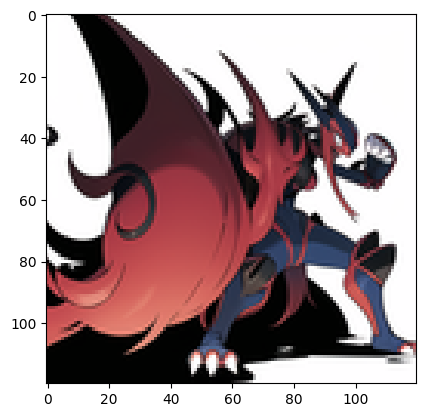

In [50]:
for sample in val_dataset3:
    pred = model1.predict(sample[0])
    pred = model1(sample[0], training=False)
    print(sample[1][0])
    print(np.around(pred[0], decimals=3))
    img = sample[0][0].numpy()
    print(img.shape)
    # print tensorflow accuracy of the prediction
    print("Accuracy: ", (tf.keras.metrics.binary_accuracy(sample[1][0], pred[0]).numpy()))

    plt.imshow(img, interpolation='nearest')
    plt.show()
    break